# DSCI 619 Deep Learning
# Week 4: Build Convolutional Neural Network (CNN) Models



**Objectives**

After you complete this module, students will be able to:


+ Understand the convolution layers and pooling layers
+ Apply the CNN networks to perform image classification
+ Load and preprocess images from local storage
+ Configure the Dataset for Better performance
+ Perform the image data augmentation techniques
+ Apply transfer learning to perform image classification

Convolutional Neural Network (CNN) is a very popular model in deep learning. First, we cover the convolutional filter and pooling filter to extract features from images.  Next, we will cover the CNN model to perform image classification. Third, we will show how to load the images from the local disk and apply the image data augmentation techniques. Finally, we will learn how to use transfer learning to improve model performance.  

**Readings**

+ Convolutional Neural Network (CNN)(https://www.tensorflow.org/tutorials/images/cnn)
+ Image classification (https://www.tensorflow.org/tutorials/images/classification)
+ Transfer learning and fine-tuning (https://www.tensorflow.org/tutorials/images/transfer_learning)
+ Convolutional Neural Networks (https://d2l.ai/chapter_convolutional-neural-networks/index.html)
+ Modern Convolutional Neural Networks (https://d2l.ai/chapter_convolutional-modern/index.html)



# Project of CIFAR-10 Image Classification Using TensorFlow

Let’s look at a real-world project of image classification using TensorFlow. We will cover how to perform image classification using CNN.
This CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html) containing 60,000 32x32 color images in 10 classes. It is a balanced classification with  6000 images for each class. The training dataset has 50,000 images, and the test data contains 10,000 images.



## Load and Clean the Data

First, we load the libraries. 

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


It is a built-in dataset in TensorFlow. Let's load it into memory. It is about 163 MB. It contains the following features:
(see https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data)

 + **images** : color images with size of 32*32*3
 + **label**:  category labels (integers in range 0-9) 


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

Next, let's check the sizes of the datasets.

In [3]:
print(f'train_images.shape = {train_images.shape}; train_labels.shape = {train_labels.shape}')

train_images.shape = (50000, 32, 32, 3); train_labels.shape = (50000, 1)


In [4]:
print(f'test_images.shape = {test_images.shape}; test_labels.shape = {test_labels.shape}')

test_images.shape = (10000, 32, 32, 3); test_labels.shape = (10000, 1)


It is easy for us to see that:

+ The label is a two-dimensional array with a fixed size of 1 in the second dimension, as we see before
+ But the features are four-dimensional vectors, unlike the typical two-dimensional vector early.
  It has the format of **(N,H,W,C)** in TensorFlow
    + N: The first dimension denotes the number of images; for example, there are 50,000 images in the training data and 10,000 images in the test dataset.
    + H: It specifies the width of an image in pixels. (see https://en.wikipedia.org/wiki/Pixel). For most images, pixel values range from 0 (black) to 255 (white). (see https://www.whydomath.org/node/wavlets/imagebasics.html)
    + W: It specifies the height of an image in pixels.
    + C: A channel is the same size as a color image with only one of these primary colors. (see https://en.wikipedia.org/wiki/Channel_(digital_image)) For example, A grayscale image has just one channel. A color image typically has three channels, red, green, and blue. In general, we may think the channel holds some information about the image. It could be a larger number, such as 64. 

Keep in mind that the **features must be a 4 D vector of (N, H, W, C) in TensorFlow**. If the images in a different format (H, W, C, N) can be converted to (N, H, W, C) using np.einsum or np.transpose. (see https://stackoverflow.com/questions/23943379/swapping-the-dimensions-of-a-numpy-array or https://stackoverflow.com/questions/37689423/convert-between-nhwc-and-nchw-in-tensorflow) 

## Visualize the Images

If we try to print out the 3D array, we have $32\times 32\times 3= 3072$ elements. We are almost get lost for so many numbers for each image.

In [5]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
import numpy as np
print(f'The maximum value of pixels = {np.amax(train_images[0])}; the minimum value of pixels ={np.amin(train_images[0])}' )

The maximum value of pixels = 255; the minimum value of pixels =0


A graph is worth a thousand numbers. We want to display the images with Python. Let's randomly show 20 pictures and label them.


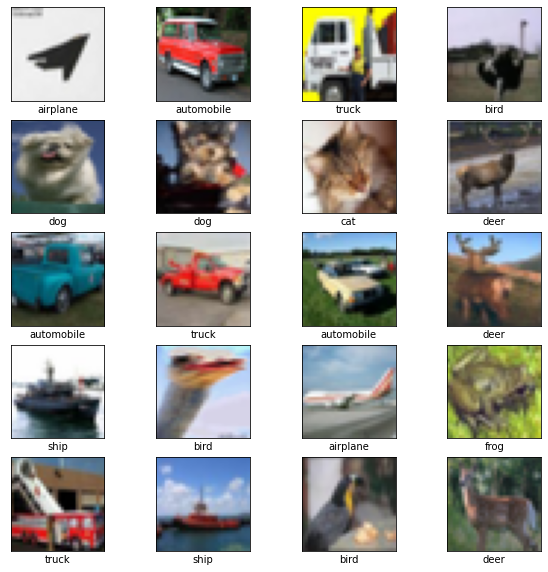

In [7]:
import matplotlib.pyplot as plt
import os
import random
from random import randrange

# Fix the seed to reproduce the results
SEED = 1001
os.environ['PYTHONHASHSEED']=str(SEED)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'  # new flag present in tf 2.0+
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Label names
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    # Random generate an index from 0 to 50,000
    image_ID = randrange(train_images.shape[0])
    # Display it
    plt.imshow(train_images[image_ID])
    # Label it by mapping the class id to class labels
    plt.xlabel(label_names[train_labels[image_ID][0]])
plt.show()

## Create a Simple CNN Model



When we do image classification, unlike typical class classification such as loan application based on  numerical features such as income and employment, etc., the image classification is very challenging in the following ways:

+  The feature is not 1 D Tensor. It is a 3-dimensional matrix such as 32*32*3 with 3072 elements.
+ There could be a dog in the image. But the dog's location could be anywhere, such as in the top left corner, center, bottom right corner, etc., our algorithm should handle the translation invariance.

Let's see how human eyes and brain can detect the Maryville Logo (**M**) in the following image: 

<img src = "MU.jpg">

When we search it, our eyes and brain only focus on a small region, for example, the size of $3\times 3$ window, then we scan it from left to the right and top to bottom using the small rolling window to cover the whole image. Our eyes may detect three **M** in this image. The key idea here is to focus on a small region/window and check this rolling window with the shape of **M** in our brain. The Convolution Neural Networks (CNN) apply the same idea to detect the **M**.

+ It uses a convolution filter (or kernel window, or convolution window) that is typically very small such as $2\times 2, 3\times 3$, etc.
+ It performs the convolution operator(see: https://en.wikipedia.org/wiki/Convolution) to check the similarity.
Roughly speaking, it is the cross-correlation operation that is similar to the Pearson correlation coefficient(see: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

For example, for a given $6 \times 6$ image and a filter window size of $3 \times 3$, The following graph summarizes the convolution operation:

<img src = "CNN.png">

Source: https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks

This filter performs elementwise multiplication for corresponding pixes in the sliding windows and the filter windows. It maps $3\times 3$ matrix to a scalar.  We can estimate the filter's weights from the data. This figure can help us detect edges in images.

The dynamic graphs above move 1-pixel horizontally and vertically. It is called the stride =1. When we roll the filter window from left to right or top to bottom, we may move more than 1 pixel, such as 2 pixels. It is called the **strides** of the convolution along with the height and width.

By the graph above, we can see that it lose pixels after convolution is applied. We can add pixel values of zeros around the input image. There are two typically paddings in TensorFlow.
+ "valid" menas no padding
+ "same" results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.

Padding is very important in CNN. It is summarized in the following:

1. It's easier to design networks if we preserve the height and width and don't have to worry too much about tensor dimensions when going from one layer to another because dimensions will just "work".

2. It allows us to design deeper networks. Without padding, a reduction in volume size would reduce too quickly.

3. Padding improves performance by keeping information at the borders. 

Source: https://stats.stackexchange.com/questions/246512/convolutional-layers-to-pad-or-not-to-pad




After we apply the convolution layer, we typically apply a pooling layer (see https://d2l.ai/chapter_convolutional-neural-networks/pooling.html)  using a small pooling window as $ 2 \times 2$. It helps reduce the dimensionality of the output. There are two popular pooling methods:
+ Maximum pooling takes the maximum pixel in the pooling window. It is the most commonly used method in CNN.
+ Average pooling takes the average of pixels in the pooling.

We can apply many layers of convolution and pooling to summarize the image. Finally, We typically get a 4-dimensional matrix of $N\ times H\times W \times C$. 

We will use two functions of **tf.keras.layers.Conv2D** (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)  and **tf.keras.layers.MaxPooling2D** (https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) to perform image classification.

Let's build the Convolutional Neural Network (CNN) model using TensorFlow.

In [8]:

model = models.Sequential()
# Get the image size using codes instead of using magic number (32,32,3)
input_shape =train_images.shape
print(f'The input shape = {input_shape[1:]}')
# The first Convolution layer has 32 filters, with the output has 32 channels. The size of the filter is 3*3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape= input_shape[1:]))
# Followed by 2*2 pooling window 
model.add(layers.MaxPooling2D((2, 2)))
# The second Convolution layer has 64 filters, with the output has 64 channels. The size of the filter is 3*3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Followed by 2*2 pooling window 
model.add(layers.MaxPooling2D((2, 2)))
# The second Convolution layer has 64 filters, with the output has 64 channels. The size of the filter is 3*3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# The Third Convolution layer has 64 filters, with the output has 64 channels. The size of the filter is 2*2
model.add(layers.Conv2D(64, (2, 2), activation='relu'))

The input shape = (32, 32, 3)


Let's summarize the model structures.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          16448     
Total params: 72,768
Trainable params: 72,768
Non-trainable params: 0
____________________________________________________

It is easy to see that:
+ The height and width of the image decrease from (30,30) to (15,15), ... (2,2).
+ But we increase the number of filters/channels in the Conv2d operation
+ The pooling method doesn't change the number of channels, and it only shrinks the image size.

## Add Classifier at the End

The target has ten cases. It is a classification problem. We have learned how to perform classification using neuron networks on a 2-dimensional features matrix of $ N\times C$. But the inputs (the output of the last layer above is a 4D matrix). Therefore we need to convert the 4D matrix to a 2D matrix. TensorFlow provides **tf.keras.layers.Flatten** (see https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) to flattens the input from a 4D to a 2D matrix. 

Since there are ten unique cases in the label, the last layer must use ten neurons. 

In [10]:
# Convert  feature matrix from 4D to 2D
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# Add dropout layer
model.add(layers.Dropout(0.2))
# Last layer must have 10 neuron to match the label
model.add(layers.Dense(10))

Next, let's summarize the model architecture and pay special attention to the output shape.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          16448     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

The model summary is a nice function to summarize the shapes of the output. But the shapes of the inputs are not explicitly shown there. We can use **tf.keras.utils.plot_model** to plot the model. It plot both the input shapes and out shapes for each layer. 

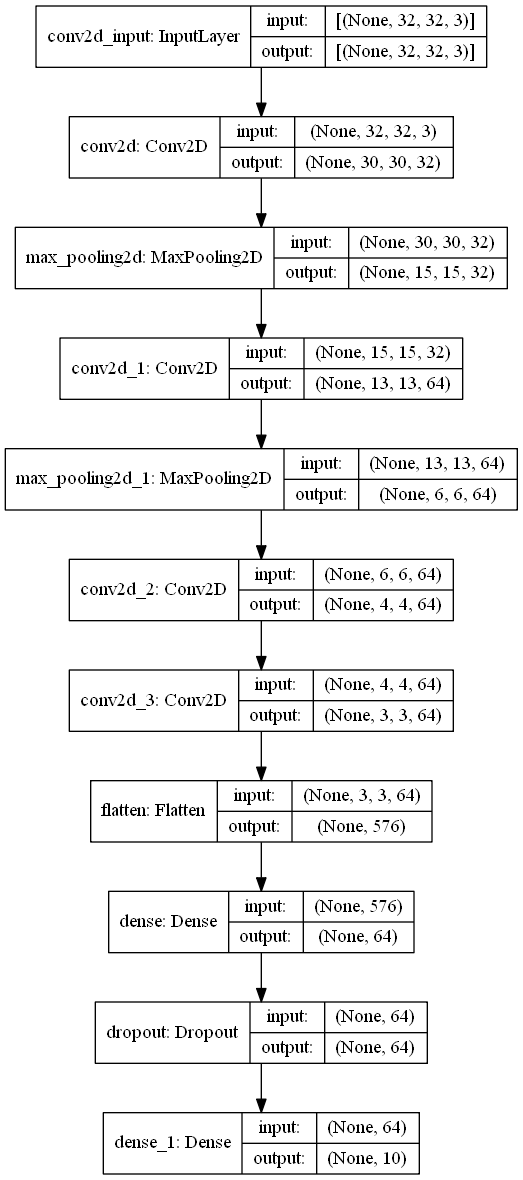

In [12]:
dot_img_file = 'CNNmodel.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

## Configure the Model

It is a multiclass classification problem; the label is encoded as an integer. Therefore the loss function should be **tf.keras.losses.SparseCategoricalCrossentropy** (see https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)

In [13]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



## Train the Model

Next, we train our model using **early stopping** (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping). The training will be stopped in three epochs with no improvement.

In [14]:
%%time
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 3)
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels), callbacks=[callback], verbose = 1)

Epoch 1/20
1563/1563 [==============================] - 28s 18ms/step - loss: 2.2123 - accuracy: 0.2609 - val_loss: 1.4307 - val_accuracy: 0.4701
Epoch 2/20
1563/1563 [==============================] - 24s 16ms/step - loss: 1.4607 - accuracy: 0.4760 - val_loss: 1.5239 - val_accuracy: 0.4621
Epoch 3/20
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3196 - accuracy: 0.5308 - val_loss: 1.3032 - val_accuracy: 0.5330
Epoch 4/20
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2070 - accuracy: 0.5762 - val_loss: 1.1811 - val_accuracy: 0.5860
Epoch 5/20
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1179 - accuracy: 0.6081 - val_loss: 1.1399 - val_accuracy: 0.5926
Epoch 6/20
1563/1563 [==============================] - 24s 16ms/step - loss: 1.0694 - accuracy: 0.6255 - val_loss: 1.0998 - val_accuracy: 0.6130
Epoch 7/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0128 - accuracy: 0.6458 - val_loss: 1.0797 -

## Evaluate the Model

Finally, we evaluate our model by checking the in-sample fit and out of sample fit. 

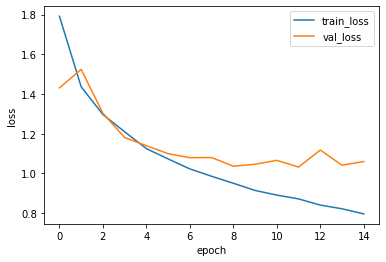

In [15]:
## Evaluate the Model
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
# Plot train loss
sns.lineplot(x='epoch', y ='loss', data =train_history)
# Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
# Add legends
plt.legend(labels=['train_loss', 'val_loss'])



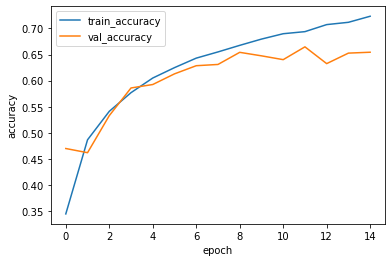

In [16]:
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
# Plot validation loss
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
# Add legends
plt.legend(labels=['train_accuracy', 'val_accuracy'])

We compute the loss and accuracy for the test dataset.

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)
print(f' The test loss ={test_loss:.2f} and test accuracy = {test_acc:.2f}')

 The test loss =1.06 and test accuracy = 0.65


# Project of Image Classification by Loading Datasets From Directories

We build our first CNN model using the build-in dataset. Next, we will cover how to perform image classification by loading large datasets from directories. Unlike the typical dataset, an input file such as loan.csv for machine learning, the image classification project typically has many color images. We need to have a better way to organize the files and directories; then, it is easy to attach a label/target as we did in machine learning.

One approach is to organize the images by folders. All the same images are put in the same directory.  Different direcotories contain different images. The label can infered from the directory names. The image file names could be arbitray under each directory. 

Let's import all libraries for this project.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import PIL #Python Imaging Library


import tensorflow as tf
from tensorflow.keras import datasets, layers, models
#from tensorflow import keras
#from tensorflow.keras import layers
#from tensorflow.keras.models import Sequential

This image dataset has 3670 images with five classes in daisy, dandelion, roses, sunflowers, and tulips. It is a balanced dataset. These images are stored in the following directory structure. 

+ flower_photos
    + daisy
    + dandelion
    + roses
    + sunflowers
    + tulips
    
    


## Download the Images 

In [19]:
import pathlib
flowers_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
img_dir = tf.keras.utils.get_file('flower_photos', origin=flowers_url, untar=True)
img_dir = pathlib.Path(img_dir)
print(f'The flower photes are stored in local directory : {img_dir}')

The flower photes are stored in local directory : C:\Users\liuyu\.keras\datasets\flower_photos


Let us list all the directories to double-check it.

In [20]:
total_files =0
for root, dirs, files in os.walk(str(img_dir)):
    level = root.replace(str(img_dir), '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/ ({len(files)} files)')
    total_files += len(files)
print(f'There are {total_files -1} images in this dataset')

flower_photos/ (1 files)
    daisy/ (633 files)
    dandelion/ (898 files)
    roses/ (641 files)
    sunflowers/ (699 files)
    tulips/ (799 files)
There are 3670 images in this dataset


We want to get the flower label by taking out the flower directory

In [21]:

flower_dir = [ name for name in list(os.listdir(img_dir)) if os.path.isdir(os.path.join(img_dir, name)) ]
print(f' The flower labels = {flower_dir}')

 The flower labels = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


(Image size  = (320, 320, 3) ; Flower = daisy)


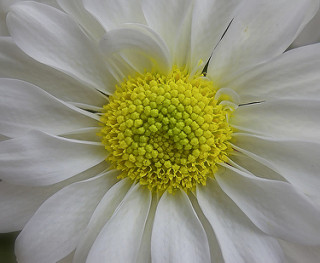

(Image size  = (320, 320, 3) ; Flower = dandelion)


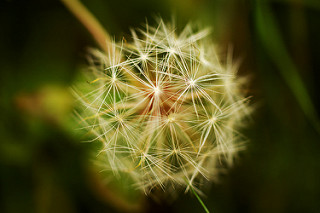

(Image size  = (179, 179, 3) ; Flower = roses)


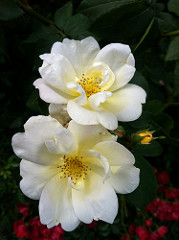

(Image size  = (500, 500, 3) ; Flower = sunflowers)


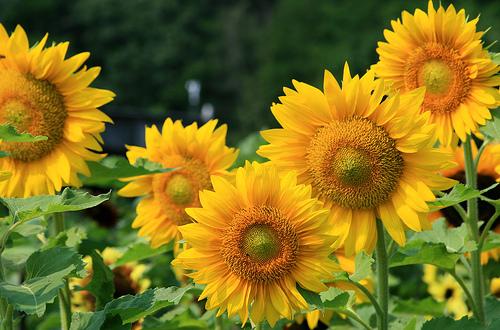

(Image size  = (320, 320, 3) ; Flower = tulips)


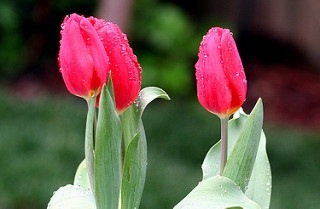

In [22]:
# Fix the seed to reproduce the results
SEED = 1001
os.environ['PYTHONHASHSEED']=str(SEED)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'  # new flag present in tf 2.0+
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

from IPython.display import display # to display images
for i in range(len(flower_dir)):
   
    image_file = list(img_dir.glob(flower_dir[i]+'/*'))
    img = PIL.Image.open(str(image_file[0]))
    
    print(f'(Image size  = ({img.size[0]}, {img.size[0]}, {len(img.mode)}) ; Flower = {flower_dir[i]})')
    display(img)
   

## Load and Preprocessing Images

We notice that the images have different sizes. TensorFlow can only **fit the images with the same size**. Therefore, we need to resize the images. Instead of writing a loop and resize it manually, we can take advantage of **tf.keras.preprocessing.image_dataset_from_directory**. It has more than ten parameters to specify. (see https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory):




In [23]:
help(tf.keras.preprocessing.image_dataset_from_directory)

Help on function image_dataset_from_directory in module tensorflow.python.keras.preprocessing.image_dataset:

image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False)
    Generates a `tf.data.Dataset` from image files in a directory.
    
    If your directory structure is:
    
    ```
    main_directory/
    ...class_a/
    ......a_image_1.jpg
    ......a_image_2.jpg
    ...class_b/
    ......b_image_1.jpg
    ......b_image_2.jpg
    ```
    
    Then calling `image_dataset_from_directory(main_directory, labels='inferred')`
    will return a `tf.data.Dataset` that yields batches of images from
    the subdirectories `class_a` and `class_b`, together with labels
    0 and 1 (0 corresponding to `class_a` and 1 corresponding to `class_b`).
    
    Supported image formats: jpeg, png, bmp, 

Let's specify several parameters for this function.

In [24]:
batch_size = 32
image_height = 256
image_width = 256
train_test_split = 0.2

In [25]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  img_dir,
  labels='inferred', # labels are generated from the directory structure
  label_mode='int', #'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss).
  validation_split= train_test_split,
  subset="training",
  seed= 1001, #fix the seed
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [26]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  img_dir,
  labels='inferred',
  label_mode='int',
  validation_split= train_test_split,
  subset="validation",
  seed=1001,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


## Visualize the Images

In [27]:
for img, lab in train_data.take(1):
    print(img[1].numpy().astype("uint16"))
    print(f'minimum = {np.amin(img[0].numpy().astype("uint16"))}, maximum = {np.amax(img[0].numpy().astype("uint16"))}')
    break


[[[217 217 207]
  [217 217 207]
  [216 216 205]
  ...
  [190 192 189]
  [189 191 188]
  [189 191 188]]

 [[216 217 207]
  [217 217 207]
  [217 217 206]
  ...
  [190 192 189]
  [189 192 189]
  [189 192 189]]

 [[216 218 207]
  [216 217 207]
  [216 217 207]
  ...
  [190 192 189]
  [187 192 188]
  [188 193 189]]

 ...

 [[ 71  83  11]
  [ 64  57  17]
  [ 68  54  21]
  ...
  [102  99  25]
  [ 92  84  22]
  [111 104  33]]

 [[ 67  65  17]
  [ 76  66  29]
  [ 78  65  26]
  ...
  [109 115  35]
  [102  99  25]
  [ 93  88  21]]

 [[ 57  54  11]
  [ 68  60  23]
  [ 82  69  27]
  ...
  [ 84  89  17]
  [116 116  39]
  [ 95  93  29]]]
minimum = 0, maximum = 255


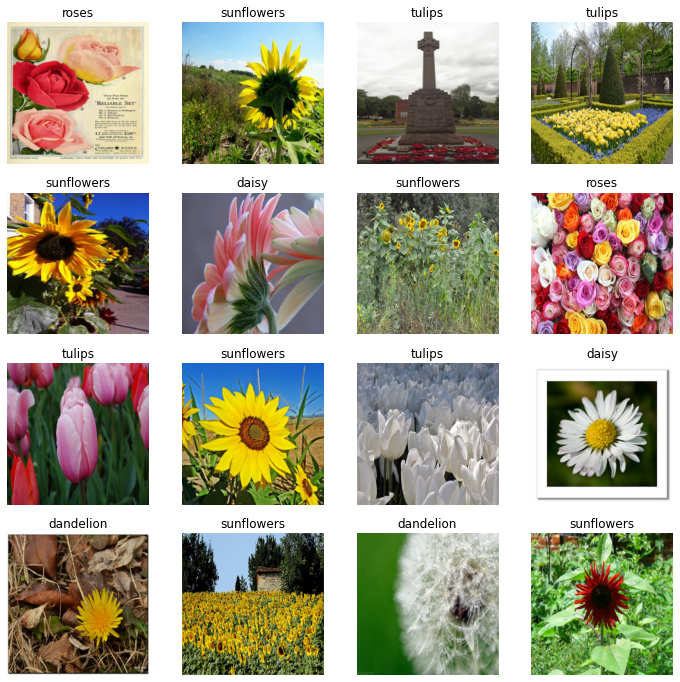

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for img, lab in train_data.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(img[i].numpy().astype("uint16"))
    # Map the label index to name
    plt.title(flower_dir[lab[i]]) 
    plt.axis("off")

In [29]:
type(train_data)
for image_batch, labels_batch in train_data:
  print(f'image_batch.shape = {image_batch.shape};labels_batch.shape = {labels_batch.shape } ')
  break


image_batch.shape = (32, 256, 256, 3);labels_batch.shape = (32,) 


Note here, the shape of one batch of the images is (32, 256, 256, 3) where
+ N =32 images per batch
+ Height = 256;
+ Width = 256
+ Channel = 3 for RGB colors

## Configure the Dataset for Better performance

The images dataset is typically very large. We don't need to load all the images into the memory. The TensorFlow engine can iterate over the images and process them in a streaming fashion. We can take advantage of the following methods to improve the performance and speed up our model fitting (see https://www.tensorflow.org/guide/data_performance):

+ Caching can help cache a dataset either in memory or on a local disk.
+ Prefetching help overlap the preprocessing and model training step. We can call **tf.data.Dataset.prefetch**.
+ Shuffle is applied to reduce memory usage.

In [30]:
AUTOTUNE = tf.data.AUTOTUNE # Tune the value dynamically at runtime.

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

## Normalize the Data

The range of the pixel values in the images is between  0 and 255. To improve the performance, we typically convert it to numbers between 0 and 1 using **layers.experimental.preprocessing.Rescaling** (see https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Rescaling).

In [31]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255.0)

## Create the CNN Model

In [32]:
num_labels = len(flower_dir)
print(f'There are {num_labels} classes in the image dataset')
image_channel = 3
print(f' There are {image_channel} channels in the images')
model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, image_channel)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_labels)
])

There are 5 classes in the image dataset
 There are 3 channels in the images


Let's summarize the model architecture.

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)       

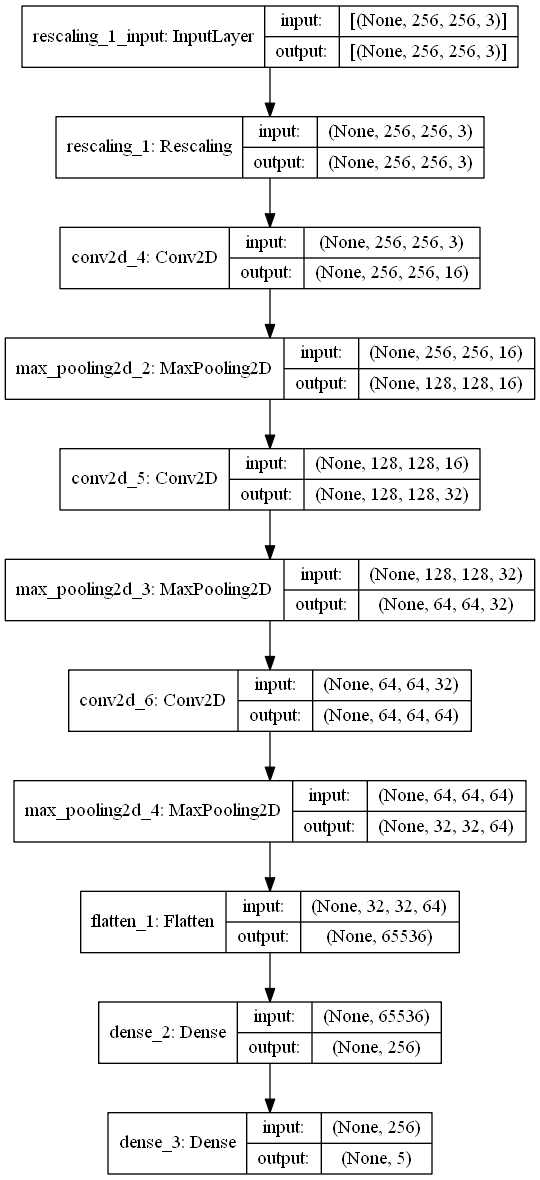

In [34]:

tf.keras.utils.plot_model(model, show_shapes=True)

## Configure the model

The label has 5 classes. It is encoded as an integer. Therefore, the loss function should be **tf.keras.losses.SparseCategoricalCrossentropy**.

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the CNN Model

Next, we train our model using **early stopping** (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping). The training will be stopped in three epochs with no improvement.

In [36]:
%%time
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 3)
epochs= 20
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs,
  callbacks=[callback], verbose = 1
)

Epoch 1/20
92/92 [==============================] - 70s 650ms/step - loss: 2.1584 - accuracy: 0.3474 - val_loss: 1.2210 - val_accuracy: 0.5204
Epoch 2/20
92/92 [==============================] - 59s 638ms/step - loss: 1.0138 - accuracy: 0.6050 - val_loss: 0.9982 - val_accuracy: 0.5913
Epoch 3/20
92/92 [==============================] - 58s 630ms/step - loss: 0.7883 - accuracy: 0.7054 - val_loss: 1.0190 - val_accuracy: 0.6104
Epoch 4/20
92/92 [==============================] - 59s 637ms/step - loss: 0.4800 - accuracy: 0.8378 - val_loss: 1.2125 - val_accuracy: 0.5995
Epoch 5/20
92/92 [==============================] - 59s 641ms/step - loss: 0.2411 - accuracy: 0.9260 - val_loss: 1.4147 - val_accuracy: 0.6063
Epoch 6/20
92/92 [==============================] - 59s 643ms/step - loss: 0.1435 - accuracy: 0.9589 - val_loss: 1.9818 - val_accuracy: 0.5777
Wall time: 6min 3s


## Evaluate the CNN Model

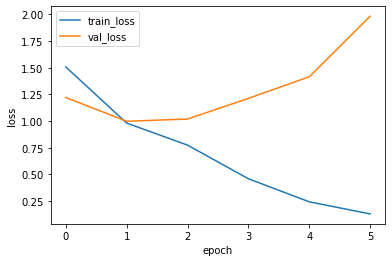

In [37]:
## Evaluate the Model
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
#Plot train loss
sns.lineplot(x='epoch', y ='loss', data =train_history)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
#Add legends
plt.legend(labels=['train_loss', 'val_loss'])



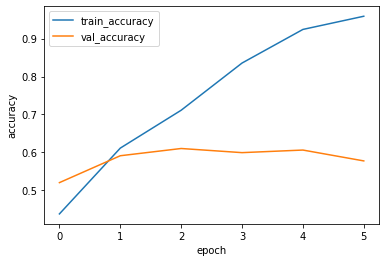

In [38]:
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
#Add legends
plt.legend(labels=['train_accuracy', 'val_accuracy'])

## Address Overfitting/Underfitting using Data Augmentation

We notice that each class has about 600 training images. It is well known that neuron networks work better on a large dataset. We can generate more input images by data augmentation (see https://en.wikipedia.org/wiki/Data_augmentation). We can augment images using transformations of images.

**tf.keras.layers.experimental.preprocessing**(see https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing) supports many data preprocessing methods. 

In [39]:
data_aug = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(image_height, 
                                                              image_width,
                                                              image_channel)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=0.1,width_factor = 0.1 ),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(0.1, 0.1))
  ]
)

For illustration purposes, We can apply the data augmentation to an image and obtain many new images.

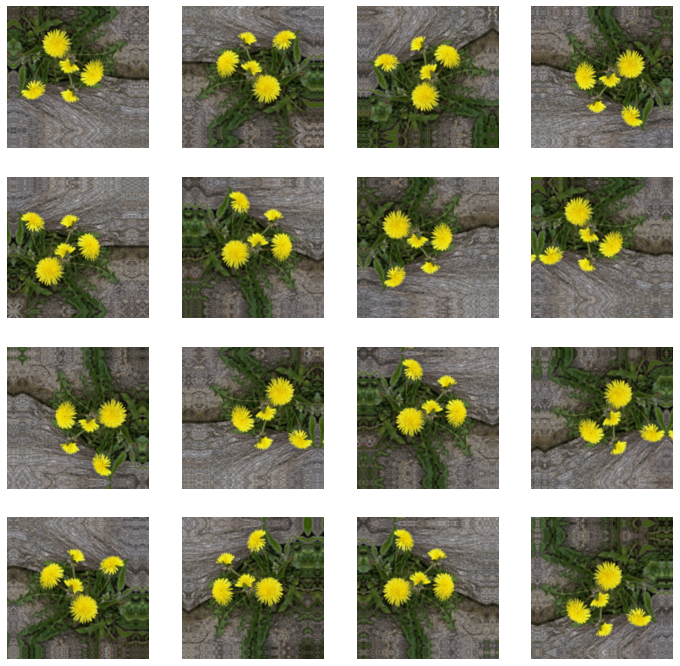

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for img, lab in train_data.take(1):
  for i in range(16):
    aug_images = data_aug(img)
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(aug_images[0].numpy().astype("uint16"))
    plt.axis("off")

We build another model by adding the data augmentation and data normalization.

In [41]:
model = tf.keras.Sequential([
  # Data augmentation
  data_aug,
  # Data normalization
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_labels)
])

## Configure the Model


The label has 5 classes. It is encoded as an integer. Therefore, the loss function should be **tf.keras.losses.SparseCategoricalCrossentropy**.


In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)       

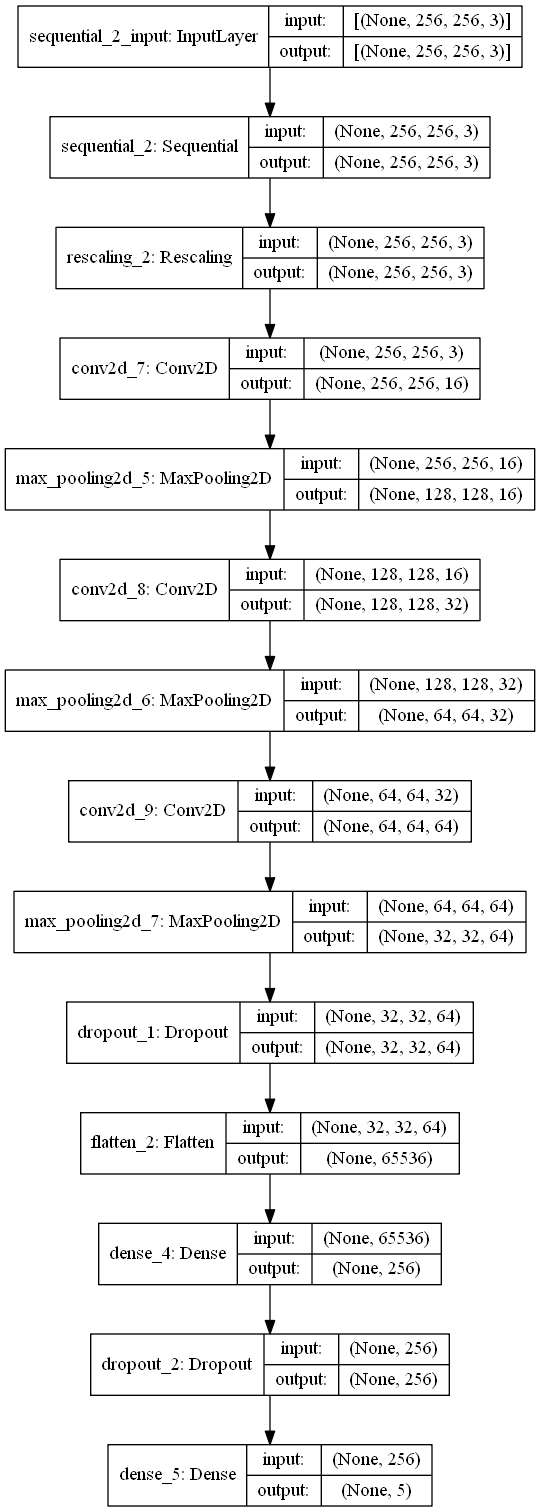

In [44]:
tf.keras.utils.plot_model(model, show_shapes=True)

## Train the Model

Next, we train our model using **early stopping** (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping). The training will be stopped in three epochs with no improvement.

In [45]:
%%time
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 3)
epochs= 20
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs,
  callbacks=[callback], verbose = 1
)

Epoch 1/20
92/92 [==============================] - 72s 778ms/step - loss: 2.1138 - accuracy: 0.2965 - val_loss: 1.1957 - val_accuracy: 0.4905
Epoch 2/20
92/92 [==============================] - 71s 769ms/step - loss: 1.1699 - accuracy: 0.5167 - val_loss: 1.0600 - val_accuracy: 0.5858
Epoch 3/20
92/92 [==============================] - 71s 777ms/step - loss: 1.0656 - accuracy: 0.5782 - val_loss: 1.0423 - val_accuracy: 0.5926
Epoch 4/20
92/92 [==============================] - 71s 777ms/step - loss: 1.0048 - accuracy: 0.5939 - val_loss: 0.9216 - val_accuracy: 0.6240
Epoch 5/20
92/92 [==============================] - 72s 784ms/step - loss: 0.9226 - accuracy: 0.6467 - val_loss: 0.8731 - val_accuracy: 0.6717
Epoch 6/20
92/92 [==============================] - 71s 776ms/step - loss: 0.8589 - accuracy: 0.6603 - val_loss: 0.9384 - val_accuracy: 0.6403
Epoch 7/20
92/92 [==============================] - 72s 784ms/step - loss: 0.8807 - accuracy: 0.6541 - val_loss: 0.8785 - val_accuracy: 0.6798

## Evaluate the Model

Finally, we evaluate our model by checking the in-sample fit and out of sample fit. 

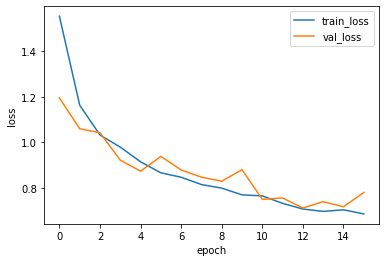

In [46]:
## Evaluate the Model
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
#Plot train loss
sns.lineplot(x='epoch', y ='loss', data =train_history)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
#Add legends
plt.legend(labels=['train_loss', 'val_loss'])


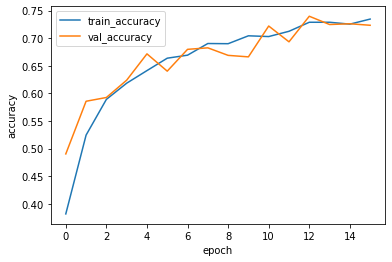

In [47]:
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
#Add legends
plt.legend(labels=['train_accuracy', 'val_accuracy'])

# Create the Image Classification Model Using Transfer Learning from a Pre-trained Network

Instead of training the model from scratch, we can take advantage of the pre-trained neuron network on a large dataset. It is very time-consuming to train it. We don't need to reinvent the wheel. We can stand on the shoulders of the giants. 

TensorFlow includes the following pre-trained neuron networks. (see https://www.tensorflow.org/api_docs/python/tf/keras/applications)

+ **densenet module**: DenseNet models for Keras.

+ **efficientnet module**: EfficientNet models for Keras.

+ **imagenet_utils module**: Utilities for ImageNet data preprocessing & prediction decoding.

+ **inception_resnet_v2 module**: Inception-ResNet V2 model for Keras.

+ **inception_v3 module**: Inception V3 model for Keras.

+ **mobilenet module**: MobileNet v1 models for Keras.

+ **mobilenet_v2 module**: MobileNet v2 models for Keras.

+ **mobilenet_v3 module**: MobileNet v3 models for Keras.

+ **nasnet module**: NASNet-A models for Keras.

+ **resnet module**: ResNet models for Keras.

+ **resnet50 module**: Public API for tf.keras.applications.resnet50 namespace.

+ **resnet_v2 module**: ResNet v2 models for Keras.

+ **vgg16 module**: VGG16 model for Keras.

+ **vgg19 module**: VGG19 model for Keras.

+ **xception module**: Xception V1 model for Keras.

We typically need to **remove the last layer/top (fully-connected layer)** of the neuron network and **add our classifier in the end**.

For illustration purpose, we use the **tf.keras.applications.MobileNetV3Large** (see https://www.tensorflow.org/api_docs/python/tf/keras/applications/MobileNetV3Large) 

In [48]:
# Specify the image size for our dataset
IMG_SHAPE = (image_height, image_width, image_channel)

MobileNetV3Large_model = tf.keras.applications.MobileNetV3Large(input_shape = IMG_SHAPE,
                                               include_top=False, # Remove the fully-connected layer
                                               weights='imagenet') # Pre-training on ImageNet

Let's look at the model architecture. We find that it is a very deep network.

In [49]:
MobileNetV3Large_model.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 128, 128, 16) 432         rescaling_3[0][0]                
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 128, 128, 16) 64          Conv[0][0]                       
___________________________________________________________________________________

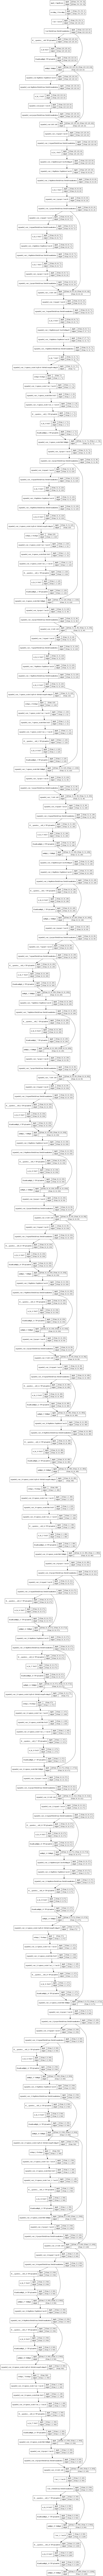

In [50]:
tf.keras.utils.plot_model(MobileNetV3Large_model, show_shapes=True)

## Freeze the Convolutional Base

It is a very deep network. We don't want to retrain the convolutional base. Therefore we need to freeze it and avoid these weights in these layers being updated.

In [51]:
MobileNetV3Large_model.trainable = False

We should be consistent with the preprocessing in the MobileNet. Let's import this function from the built-in model.

In [52]:
preprocess_input = tf.keras.applications.mobilenet_v3.preprocess_input

Let's take out a batch of data and check the size of the feature matrix.

In [53]:
image_batch, label_batch = next(iter(train_data))
feature_batch = MobileNetV3Large_model(image_batch)
print(feature_batch.shape)

(32, 8, 8, 1280)


It is a 4D matrix. We need to convert it to a 2D matrix. Then we can add the classification layer and perform classification.

In [54]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [55]:

global_average_layer = tf.keras.layers.Flatten()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 81920)


## Add the Top Layer (Classifier)

In [56]:
prediction_layer = tf.keras.layers.Dense(5)
prediction_batch = prediction_layer(feature_batch_average)
print(f' The size of the predicted value for a given batch = {prediction_batch.shape}')

 The size of the predicted value for a given batch = (32, 5)


## Create the Model Using Transfer Learning

We create the model using functional API instead of sequential API.  We need to define the inputs separately. We make a model object by specifying the initial inputs and final outputs of the neuron network.
It is more flexible than sequential API. 

In [57]:
inputs = tf.keras.Input(shape = IMG_SHAPE)
x = data_aug(inputs)
x = preprocess_input(x)
x = MobileNetV3Large_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

## Configure the Model


The label has 5 classes. It is encoded as an integer. Therefore, the loss function should be **tf.keras.losses.SparseCategoricalCrossentropy**.

In [58]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [59]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
MobilenetV3large (Functional (None, 8, 8, 1280)        4226432   
_________________________________________________________________
flatten_3 (Flatten)          (None, 81920)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 81920)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 409605    
Total params: 4,636,037
Trainable params: 409,605
Non-trainable params: 4,226,432
_____________________________________________

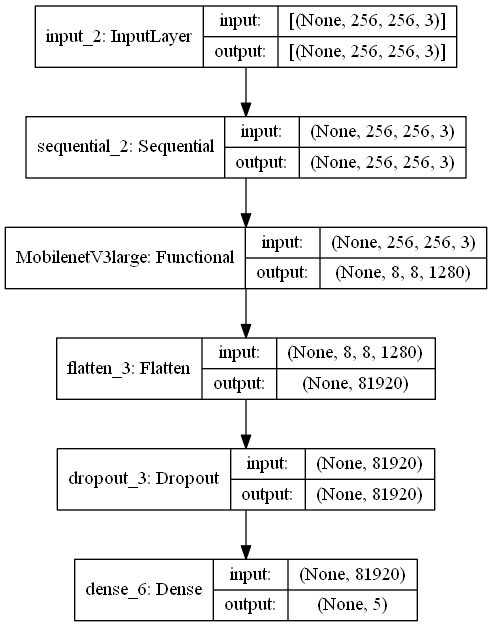

In [60]:
tf.keras.utils.plot_model(model, show_shapes=True)

## Train the Model

Next, we train our model using **early stopping** (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping). The training will be stopped in three epochs with no improvement.

In [61]:
%%time
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 3)
epochs= 20
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs,
  callbacks=[callback], verbose = 1
)

Epoch 1/20
92/92 [==============================] - 86s 875ms/step - loss: 2.0173 - accuracy: 0.5167 - val_loss: 0.7125 - val_accuracy: 0.8065
Epoch 2/20
92/92 [==============================] - 78s 845ms/step - loss: 0.9106 - accuracy: 0.7745 - val_loss: 0.6910 - val_accuracy: 0.8229
Epoch 3/20
92/92 [==============================] - 78s 846ms/step - loss: 0.5835 - accuracy: 0.8324 - val_loss: 0.5889 - val_accuracy: 0.8583
Epoch 4/20
92/92 [==============================] - 79s 857ms/step - loss: 0.5456 - accuracy: 0.8490 - val_loss: 0.7725 - val_accuracy: 0.8365
Epoch 5/20
92/92 [==============================] - 78s 847ms/step - loss: 0.4357 - accuracy: 0.8790 - val_loss: 0.6096 - val_accuracy: 0.8583
Epoch 6/20
92/92 [==============================] - 79s 857ms/step - loss: 0.4753 - accuracy: 0.8792 - val_loss: 0.6148 - val_accuracy: 0.8787
Epoch 7/20
92/92 [==============================] - 78s 844ms/step - loss: 0.3812 - accuracy: 0.8955 - val_loss: 0.6128 - val_accuracy: 0.8760

## Evaluate the Model

Finally, we evaluate our model by checking the in-sample fit and out of sample fit. 

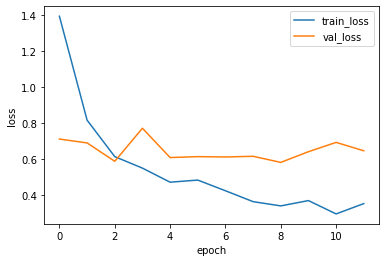

In [62]:
## Evaluate the Model
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
#Plot train loss
sns.lineplot(x='epoch', y ='loss', data =train_history)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
#Add legends
plt.legend(labels=['train_loss', 'val_loss'])

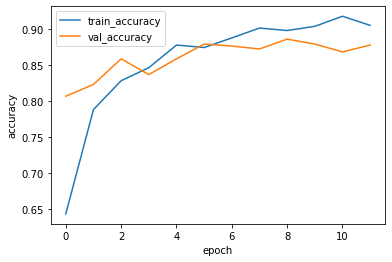

In [63]:
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
#Add legends
plt.legend(labels=['train_accuracy', 'val_accuracy'])

## Evaluate the Model on the New Data

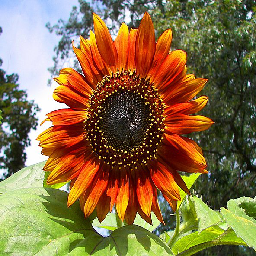

In [64]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('sunflower', origin=sunflower_url)

img = tf.keras.preprocessing.image.load_img(
    sunflower_path, target_size=(image_height, image_width)
)

img



In [65]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
print(f' The image shape = {img_array.shape}')

 The image shape = (256, 256, 3)


Reshape the image from 3D to 4D in the format of (N, H, W, C)

In [66]:

img_array = tf.expand_dims(img_array, 0)
print(f' The image shape = {img_array.shape}')


 The image shape = (1, 256, 256, 3)


In [67]:
# Compute the 
predictions = model.predict(img_array)
# Compute the softmax, i.e., obtain the probabilities of each class
score = tf.nn.softmax(predictions)
print(f'(This image probably belongs to {flower_dir[np.argmax(score)]} with a {100 * np.max(score):.2f} percent probability.)')

(This image probably belongs to sunflowers with a 100.00 percent probability.)
